Amirali Shahriary

In [199]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [200]:
# Load the data from the CSV file
#data = pd.read_csv('/home/amirali/Downloads/housePrice.csv') 
data = pd.read_csv('housePrice.csv')


# Remove entries with missing or incorrect values
data = data.dropna()  # Remove rows with any missing values
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')
data = data[data['Area'] < 449]  # i found this area based on searching among the data so i can Remove rows with unrealistically large house size 
data = data.dropna(subset=['Address']) # Drop rows with missing values in the 'Address' column


In [201]:
# we convert them to numeric format
data['Parking'] = data['Parking'].astype(int)
data['Warehouse'] = data['Warehouse'].astype(int)
data['Elevator'] = data['Elevator'].astype(int)

In [202]:
data.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
5,70.0,2,1,1,0,North Program Organization,2.050000e+09,68333.33
6,87.0,2,1,1,1,Pardis,6.000000e+08,20000.00
7,59.0,1,1,1,1,Shahran,2.150000e+09,71666.67
8,54.0,2,1,1,0,Andisheh,4.930000e+08,16433.33
9,71.0,1,1,1,1,West Ferdows Boulevard,2.370000e+09,79000.00


In [203]:
data.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3.424000e+03
mean,103.045853,2.072138,0.847255,0.915888,0.792056,5.185736e+09,1.728579e+05
std,52.314700,0.746045,0.359794,0.277596,0.405896,7.318841e+09,2.439614e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,68.000000,2.000000,1.000000,1.000000,1.000000,1.400000e+09,4.666667e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.850000e+09,9.500000e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,420.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


In [204]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3424 non-null   float64
 1   Room        3424 non-null   int64  
 2   Parking     3424 non-null   int64  
 3   Warehouse   3424 non-null   int64  
 4   Elevator    3424 non-null   int64  
 5   Address     3424 non-null   object 
 6   Price       3424 non-null   float64
 7   Price(USD)  3424 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 240.8+ KB
None


In [205]:
#now as we know in Regression we must only face with numeric values so we convert addreses into a hashed numbers.
encoder =LabelEncoder()
data['Address'] =encoder.fit_transform(data.Address)

In [206]:
# as you can see address are now describe with hashing numbers.
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,154,1.850000e+09,61666.67
1,60.0,1,1,1,1,154,1.850000e+09,61666.67
2,79.0,2,1,1,1,115,5.500000e+08,18333.33
3,95.0,2,1,1,1,150,9.025000e+08,30083.33
4,123.0,2,1,1,1,148,7.000000e+09,233333.33


In [207]:
# Here we examine the impact of each variable on the price.
corr_matrix =data.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price         1.000000
Price(USD)    1.000000
Area          0.797535
Room          0.569760
Parking       0.210285
Elevator      0.159948
Warehouse     0.124628
Address      -0.074624
Name: Price, dtype: float64

In [208]:
#here we use the most effective factor for house price (location) and give The value of each address(ratio)
# Make a copy of the original data
modeling_data = data.copy()
mean_area = modeling_data.groupby('Address')['Area'].mean()
mean_price = modeling_data.groupby('Address')['Price'].mean()
modeling_data['value_ratio'] = modeling_data['Address'].map(mean_price) / modeling_data['Address'].map(mean_area)
print(data_for_set_model)


       Area  Room  Parking  Warehouse  Elevator  Address         Price  \
0      63.0     1        1          1         1      154  1.850000e+09   
1      60.0     1        1          1         1      154  1.850000e+09   
2      79.0     2        1          1         1      115  5.500000e+08   
3      95.0     2        1          1         1      150  9.025000e+08   
4     123.0     2        1          1         1      148  7.000000e+09   
...     ...   ...      ...        ...       ...      ...           ...   
3474   86.0     2        1          1         1      161  3.500000e+09   
3475   83.0     2        1          1         1      103  6.800000e+09   
3476   75.0     2        0          0         0      113  3.650000e+08   
3477  105.0     2        1          1         1       38  5.600000e+09   
3478   82.0     2        0          1         1      113  3.600000e+08   

      Price(USD)   value ratio  Room per area  
0       61666.67  3.654189e+07       0.015873  
1       61666.6

In [209]:
#now we do the same work for second effective factor and calculate the ratio of Room to Area for each row :

modeling_data["Room_per_area"] = modeling_data['Room'] / modeling_data["Area"]
print(modeling_data.head())


    Area  Room  Parking  Warehouse  Elevator  Address         Price  \
0   63.0     1        1          1         1      154  1.850000e+09   
1   60.0     1        1          1         1      154  1.850000e+09   
2   79.0     2        1          1         1      115  5.500000e+08   
3   95.0     2        1          1         1      150  9.025000e+08   
4  123.0     2        1          1         1      148  7.000000e+09   

   Price(USD)   value_ratio  Room_per_area  
0    61666.67  3.654189e+07       0.015873  
1    61666.67  3.654189e+07       0.016667  
2    18333.33  8.014821e+06       0.025316  
3    30083.33  9.989330e+06       0.021053  
4   233333.33  8.590476e+07       0.016260  


In [210]:

corr_matrix =modeling_data.corr()
corr_matrix["Price"].sort_values(ascending =False)

Price            1.000000
Price(USD)       1.000000
Area             0.797535
value_ratio      0.712046
Room             0.569760
Parking          0.210285
Elevator         0.159948
Warehouse        0.124628
Address         -0.074624
Room_per_area   -0.385795
Name: Price, dtype: float64

In [211]:
# Now we seperate train and test part
# Split the data into training and testing sets (80% training, 20% testing)
datas=modeling_data.copy()
train_set, test_set = train_test_split(modeling_data, test_size=0.2, random_state=42)
print(train_set,test_set)

       Area  Room  Parking  Warehouse  Elevator  Address         Price  \
2637  124.0     3        1          1         1      144  3.900000e+09   
3347   80.0     2        1          1         1      180  3.000000e+09   
786    97.0     2        1          1         1       49  5.950000e+09   
3348   46.0     1        1          1         1      154  1.700000e+09   
2214   60.0     1        0          1         1      150  9.200000e+08   
...     ...   ...      ...        ...       ...      ...           ...   
1110  160.0     3        1          1         1       10  8.320000e+09   
1145  100.0     2        1          1         1      115  1.100000e+09   
1310  145.0     3        1          1         1      103  1.450000e+10   
873    62.0     1        0          1         0      123  1.100000e+09   
3222   53.0     1        0          1         1       98  2.300000e+09   

      Price(USD)   value_ratio  Room_per_area  
2637   130000.00  3.648485e+07       0.024194  
3347   100000.0

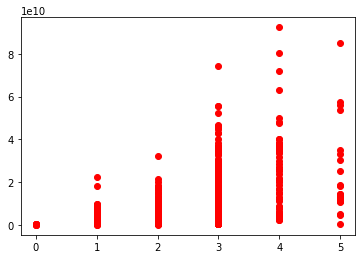

In [212]:
# Now we scatter the plot of each factor :
plt.scatter(train_set.Room, train_set.Price,  color='red')
plt.show()

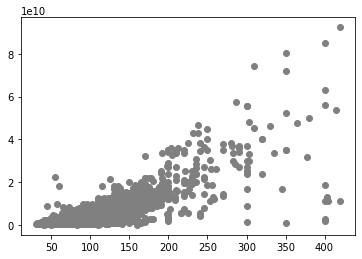

In [213]:
plt.scatter(train_set.Area, train_set.Price,  color='gray')
plt.show()

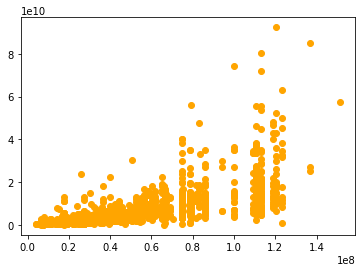

In [214]:
plt.scatter(train_set.value_ratio, train_set.Price,  color='orange')
plt.show()

In [215]:
regr =linear_model.LinearRegression()
x =np.asanyarray(train_set[['value_ratio','Room','Parking', 'Area']])
y =np.asanyarray(train_set[['Price']])
# Train the model on the training data
regr.fit (x, y)

print ('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[ 1.11624840e+02 -1.41866424e+09 -1.17197323e+09  9.98721440e+07]]
Intercept:  [-5.91544741e+09]


In [216]:
y_hat =regr.predict(test_set[['value_ratio','Room','Parking','Area']])
x =np.asanyarray(test_set[['value_ratio','Room','Parking','Area']])
y =np.asanyarray(test_set[['Price']])

print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

print('squared accuracy on the testing data: %.2f' % regr.score(x, y))

Residual sum of squares: 7185360767644452864.00
squared accuracy on the testing data: 0.82


/home/amirali/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [217]:
#suppose we have a new apartment and now want to predict the price but with inputs like how regr accept(ratio format)
new_apartment_features = [3, 2, 1, 154]

new_apartment_features = np.array(new_apartment_features).reshape(1, -1)

predicted_price = regr.predict(new_apartment_features)[0]

predicted_price_scalar = float(predicted_price)

print(f"Predicted price for the new apartment: {predicted_price_scalar:.2f} ")


Predicted price for the new apartment: 5455561393.06 
